In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.CNN import Conv1d
from genrecog.tools.trainer import CNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
lr = 0.001
model = Conv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

Conv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_1): Sequential(
    (0): Conv1d(128, 256, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_2): Sequential(
    (0): Conv1d(256, 512, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(

In [7]:
trainer = CNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 13.47
Training loss 2.6245
Validation accuracy 6.00
Validation loss 574.5582
============================== EPOCH 2 =================================
Training accuracy 16.72
Training loss 2.2910
Validation accuracy 6.00
Validation loss 58.7490
============================== EPOCH 3 =================================
Training accuracy 17.97
Training loss 2.1404
Validation accuracy 12.50
Validation loss 5.5218
============================== EPOCH 4 =================================
Training accuracy 23.03
Training loss 2.0407
Validation accuracy 18.75
Validation loss 2.4023
============================== EPOCH 5 =================================
Training accuracy 25.31
Training loss 1.9613
Validation accuracy 22.00
Validation loss 2.0336
============================== EPOCH 6 =================================
Training accuracy 25.28
Training loss 1.8967
Validation accuracy 25.50
Validation loss 1.94

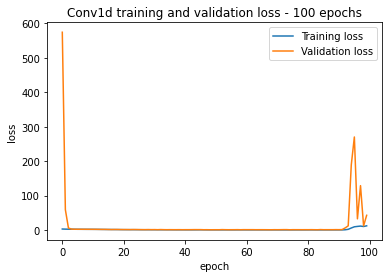

In [8]:
trainer.plot_loss("Conv1d training and validation loss - 100 epochs")

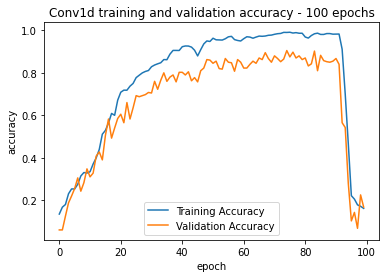

In [9]:
trainer.plot_accuracies("Conv1d training and validation accuracy - 100 epochs")

In [10]:
trainer.eval(test_dataloader)

(tensor([3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3,
         4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 8,
         4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4,
         3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 8, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
         4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3,
         3, 3, 3, 3, 3, 3, 3

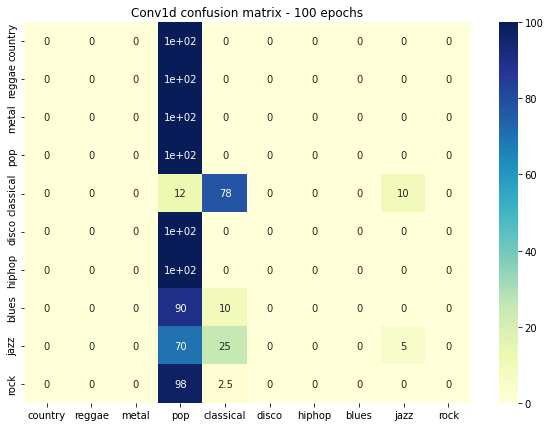

In [11]:
trainer.plot_confusion_matrix(test_dataloader, 'Conv1d confusion matrix - 100 epochs')

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.00      0.00      0.00        40
      reggae       0.00      0.00      0.00        40
       metal       0.00      0.00      0.00        40
         pop       0.11      1.00      0.21        40
   classical       0.67      0.78      0.72        40
       disco       0.00      0.00      0.00        40
      hiphop       0.00      0.00      0.00        40
       blues       0.00      0.00      0.00        40
        jazz       0.33      0.05      0.09        40
        rock       0.00      0.00      0.00        40

    accuracy                           0.18       400
   macro avg       0.11      0.18      0.10       400
weighted avg       0.11      0.18      0.10       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
lr = 0.001
model_2 = Conv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

Conv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_1): Sequential(
    (0): Conv1d(128, 256, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_2): Sequential(
    (0): Conv1d(256, 512, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(

In [22]:
trainer_2 = CNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=70)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 12.75
Training loss 2.5549
Validation accuracy 6.00
Validation loss 1158.5143
============================== EPOCH 2 =================================
Training accuracy 17.19
Training loss 2.4829
Validation accuracy 5.75
Validation loss 87.0979
============================== EPOCH 3 =================================
Training accuracy 17.59
Training loss 2.1654
Validation accuracy 15.00
Validation loss 2.2595
============================== EPOCH 4 =================================
Training accuracy 17.91
Training loss 2.1033
Validation accuracy 17.25
Validation loss 2.2387
============================== EPOCH 5 =================================
Training accuracy 20.56
Training loss 2.0522
Validation accuracy 17.25
Validation loss 2.2276
============================== EPOCH 6 =================================
Training accuracy 20.75
Training loss 1.9914
Validation accuracy 22.75
Validation loss 2.0

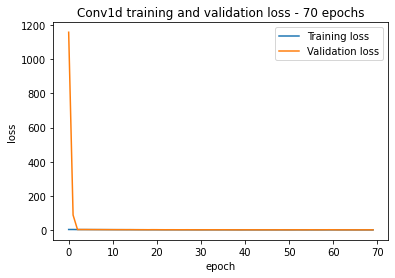

In [23]:
trainer_2.plot_loss("Conv1d training and validation loss - 70 epochs")

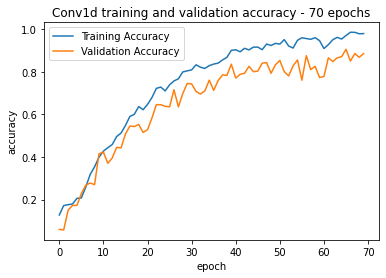

In [24]:
trainer_2.plot_accuracies("Conv1d training and validation accuracy - 70 epochs")

In [27]:
trainer_2.eval(test_dataloader)

(tensor([2, 2, 6, 0, 7, 0, 3, 5, 2, 7, 7, 9, 2, 0, 7, 7, 2, 5, 0, 8, 4, 3, 4, 1,
         7, 0, 7, 1, 4, 4, 2, 6, 8, 6, 2, 1, 0, 5, 7, 7, 2, 0, 1, 3, 6, 5, 1, 2,
         5, 0, 2, 5, 2, 3, 1, 7, 0, 9, 2, 4, 7, 8, 9, 2, 8, 9, 4, 3, 9, 1, 6, 6,
         3, 4, 2, 8, 0, 0, 4, 0, 7, 2, 5, 9, 2, 1, 0, 8, 4, 2, 9, 0, 2, 5, 6, 4,
         5, 9, 8, 7, 9, 3, 3, 8, 1, 2, 6, 9, 5, 6, 7, 2, 0, 2, 5, 4, 6, 9, 6, 6,
         6, 3, 8, 7, 0, 1, 0, 5, 0, 9, 9, 1, 6, 7, 4, 5, 7, 0, 6, 4, 3, 7, 2, 1,
         4, 7, 2, 6, 2, 0, 3, 2, 2, 9, 3, 9, 0, 0, 8, 5, 2, 0, 7, 3, 5, 7, 8, 4,
         6, 7, 7, 6, 6, 7, 8, 8, 8, 7, 9, 7, 5, 5, 7, 9, 2, 4, 0, 5, 3, 7, 4, 5,
         1, 0, 3, 0, 3, 9, 7, 8, 7, 7, 2, 0, 5, 8, 6, 5, 5, 1, 4, 4, 9, 3, 9, 8,
         6, 5, 4, 3, 6, 5, 3, 9, 5, 8, 8, 9, 8, 8, 6, 3, 0, 1, 9, 9, 5, 9, 8, 6,
         3, 7, 0, 4, 2, 6, 8, 0, 2, 7, 3, 4, 9, 3, 5, 4, 3, 9, 5, 8, 0, 5, 1, 4,
         8, 6, 3, 0, 3, 2, 7, 2, 8, 8, 9, 8, 2, 6, 2, 8, 2, 9, 2, 7, 1, 3, 5, 9,
         8, 5, 9, 6, 8, 1, 5

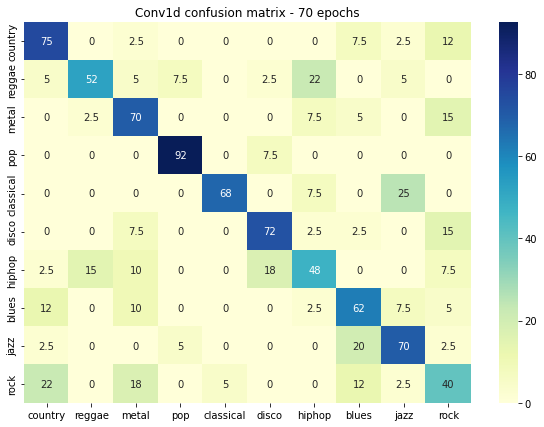

In [25]:
trainer_2.plot_confusion_matrix(test_dataloader, 'Conv1d confusion matrix - 70 epochs')

In [26]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.62      0.75      0.68        40
      reggae       0.75      0.53      0.62        40
       metal       0.57      0.70      0.63        40
         pop       0.88      0.93      0.90        40
   classical       0.93      0.68      0.78        40
       disco       0.72      0.72      0.73        40
      hiphop       0.53      0.47      0.50        40
       blues       0.57      0.62      0.60        40
        jazz       0.62      0.70      0.66        40
        rock       0.41      0.40      0.41        40

    accuracy                           0.65       400
   macro avg       0.66      0.65      0.65       400
weighted avg       0.66      0.65      0.65       400

